<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Look-at-Training-Set" data-toc-modified-id="Look-at-Training-Set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Look at Training Set</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn import datasets

# Goal

Taken from machinehack.com:

In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features. 

Size of training set: 6237 records 
Size of test set: 1560 records 

FEATURES: 
- Title: The title of the book 
- Author: The author(s) of the book
- Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018) 
- Reviews: The customer reviews about the book 
- Ratings: The customer ratings of the book 
- Synopsis: The synopsis of the book 
- Genre: The genre the book belongs to 
- BookCategory: The department the book is usually available at
- Price: The price of the book (Target variable)

# Look at Training Set

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.6+ KB


In [5]:
df.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [6]:
# plot price to see outliers
# change some of the columns 
# what to do about synopsis?

(array([5.855e+03, 3.010e+02, 4.400e+01, 2.300e+01, 5.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([   25. ,  1432.5,  2840. ,  4247.5,  5655. ,  7062.5,  8470. ,
         9877.5, 11285. , 12692.5, 14100. ]),
 <a list of 10 Patch objects>)

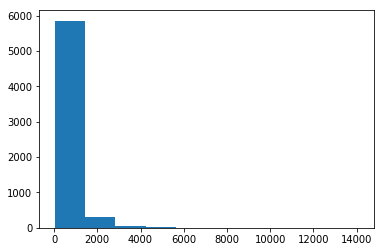

In [8]:
plt.hist(df['Price'])

In [9]:
# how many above 4000 and 6000